# Beautiful Tables in Matplotlib, a Tutorial

In this tutorial, we will explore how to use matplotlib to create highly customized tables.

## Imports

In [153]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

from PIL import Image
import urllib
import os

## A Minimal Example

In [154]:
# This is random data.
data = {
    'teams': ['Real Madrid', 'Barcelona', 'Villarreal', 'Sevilla'],
    'goals_scored': [23, 15, 28, 12]
}

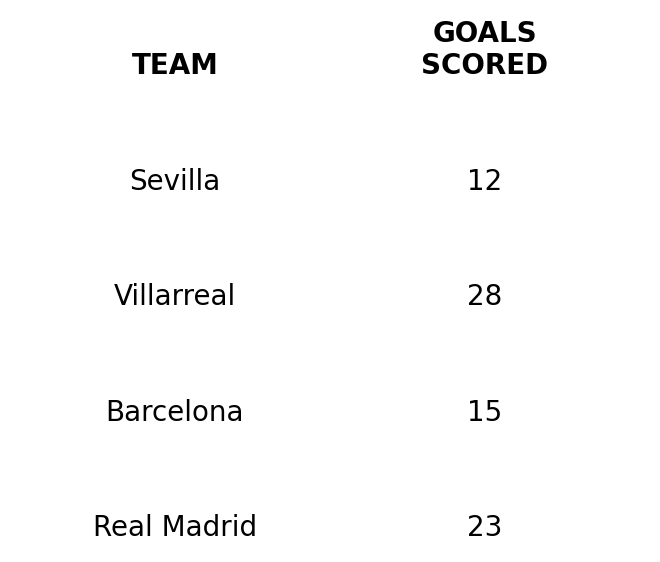

In [155]:
fig = plt.figure(figsize=(4,3), dpi=200)
ax = plt.subplot(111)

ncols = 2
nrows = 4

ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
ax.set_axis_off()

for y in range(0, nrows):
    ax.annotate(
        xy=(0.5,y),
        text=data['teams'][y],
        ha='center'
    )
    ax.annotate(
        xy=(1.5,y),
        text=data['goals_scored'][y],
        ha='center'
    )

ax.annotate(
    xy=(0.5, nrows),
    text='TEAM',
    weight='bold',
    ha='center'
)
ax.annotate(
    xy=(1.5, nrows),
    text='GOALS\nSCORED',
    weight='bold',
    ha='center'
)

plt.savefig(
    'figures/a_very_basic_table.png',
    dpi=300,
    transparent=True
)

## Reading some basic data

In [156]:
df = pd.read_csv('data/real_madrid_playing_time.csv', header=[1])
# print(tabulate(df.head(), tablefmt='pipe', headers='keys'))
df.head()

,Player,Nation,Pos,Age,MP,Min,Mn/MP,Min%,90s,Starts,...,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,Matches,-9999
0,Thibaut Courtois,be BEL,GK,29.0,36,3240.0,90.0,94.7,36.0,36,...,50.0,1.39,1.89,71.3,41.4,29.8,0.83,1.95,Matches,1840e36d
1,Éder Militão,br BRA,DF,23.0,34,3031.0,89.0,88.6,33.7,34,...,33.0,0.98,-2.72,62.5,41.0,21.4,0.64,-0.79,Matches,2784f898
2,Karim Benzema,fr FRA,FW,33.0,32,2593.0,81.0,75.8,28.8,31,...,41.0,1.42,0.55,57.5,30.6,26.9,0.93,0.86,Matches,70d74ece
3,Casemiro,br BRA,MF,29.0,32,2569.0,80.0,75.1,28.5,31,...,29.0,1.02,-1.10,51.2,34.3,16.9,0.59,-0.54,Matches,4d224fe8
4,Vinicius Júnior,br BRA,FW,21.0,35,2690.0,77.0,78.7,29.9,30,...,43.0,1.44,0.70,56.6,32.9,23.8,0.80,0.32,Matches,7111d552


For our first example, we'll begin by looking at players with more than a thousand minutes under their belt. For this sample, we'll look at the total of matches they were named in the squad and how many of them they actually played in. 

In [157]:
df_example_1 = df[df['Min'] >= 1000].reset_index(drop=True)
df_example_1 = df_example_1[['Player', 'Pos', 'MP', 'Starts', 'Subs', 'unSub']]
print(tabulate(df_example_1.head(), tablefmt='pipe', headers='keys'))
# df_example_1.head()

|    | Player           | Pos   |   MP |   Starts |   Subs |   unSub |
|---:|:-----------------|:------|-----:|---------:|-------:|--------:|
|  0 | Thibaut Courtois | GK    |   36 |       36 |      0 |       1 |
|  1 | Éder Militão     | DF    |   34 |       34 |      0 |       2 |
|  2 | Karim Benzema    | FW    |   32 |       31 |      1 |       1 |
|  3 | Casemiro         | MF    |   32 |       31 |      1 |       2 |
|  4 | Vinicius Júnior  | FW    |   35 |       30 |      5 |       0 |


In [158]:
df_example_1['InSquad'] = df_example_1['MP'] + df_example_1['unSub']
df_example_1 = df_example_1.sort_values(by='Starts').reset_index(drop=True)
df_example_1 = df_example_1[~df_example_1['Pos'].isna()]
df_example_1.head()

,Player,Pos,MP,Starts,Subs,unSub,InSquad
0,Eduardo Camavinga,MF,26,13,13,8,34
1,Nacho,DF,28,17,11,8,36
2,Dani Carvajal,DF,24,17,7,4,28
3,Rodrygo,FW,33,17,16,1,34
4,Federico Valverde,MF,31,19,12,2,33


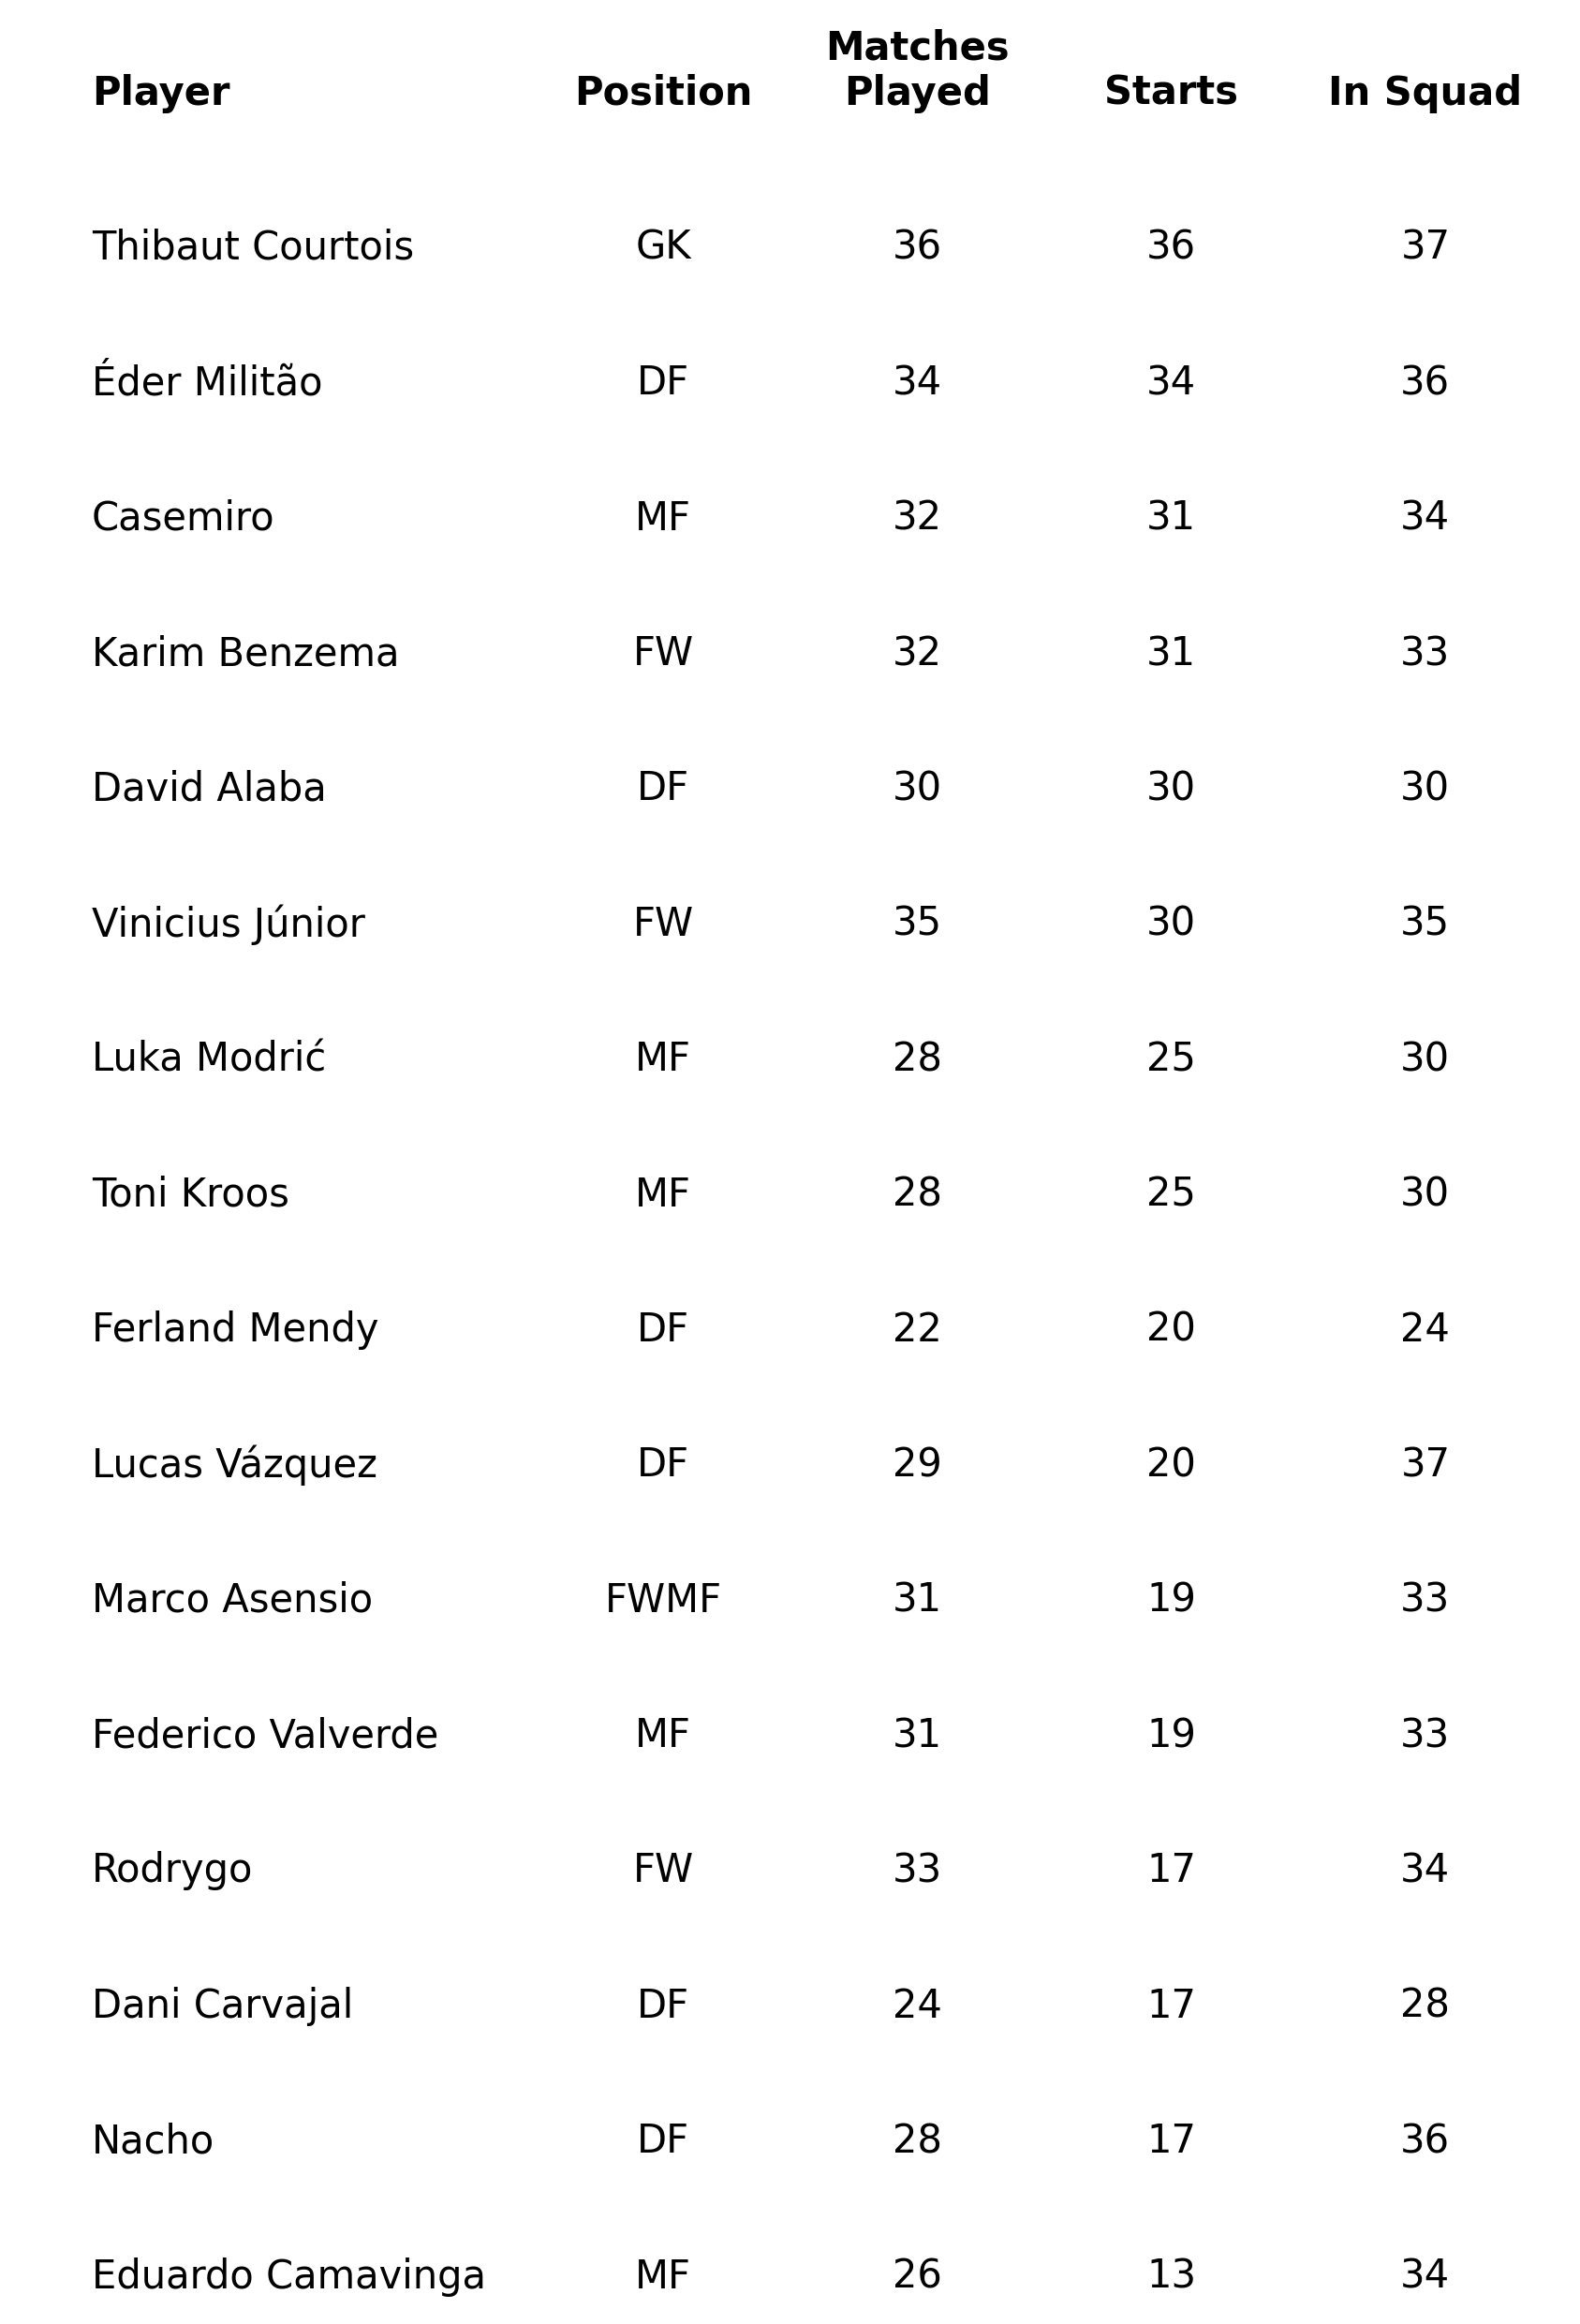

In [159]:
fig = plt.figure(figsize=(7,10), dpi=300)
ax = plt.subplot()

ncols = 5
nrows = df_example_1.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows)

positions = [0.25, 2.5, 3.5, 4.5, 5.5]
columns = ['Player', 'Pos', 'MP', 'Starts', 'InSquad']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[j], i),
            text=df_example_1[column].iloc[i],
            ha=ha,
            va='center'
        )

# Add column names
column_names = ['Player', 'Position', 'Matches\nPlayed', 'Starts', 'In Squad']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

ax.set_axis_off()
plt.savefig(
    'figures/first_useful_table.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)

## Making it pretty

In [160]:
df_example_2 = df[df['Min'] >= 1000].reset_index(drop=True)
df_example_2 = df_example_2[['Player', 'Pos', 'Min', 'MP', 'Starts', 'Subs', 'unSub']]
print(tabulate(df_example_2.head(), tablefmt='pipe', headers='keys'))

|    | Player           | Pos   |   Min |   MP |   Starts |   Subs |   unSub |
|---:|:-----------------|:------|------:|-----:|---------:|-------:|--------:|
|  0 | Thibaut Courtois | GK    |  3240 |   36 |       36 |      0 |       1 |
|  1 | Éder Militão     | DF    |  3031 |   34 |       34 |      0 |       2 |
|  2 | Karim Benzema    | FW    |  2593 |   32 |       31 |      1 |       1 |
|  3 | Casemiro         | MF    |  2569 |   32 |       31 |      1 |       2 |
|  4 | Vinicius Júnior  | FW    |  2690 |   35 |       30 |      5 |       0 |


In [161]:
df_example_2['InSquad'] = df_example_2['MP'] + df_example_2['unSub']
df_example_2 = df_example_2.sort_values(by='Min').reset_index(drop=True)
df_example_2 = df_example_2[~df_example_2['Pos'].isna()]

In [162]:
df_example_2['Starts_InSquad'] = [f'{x}/{y}' for x,y in zip(df_example_2['Starts'], df_example_2['InSquad'])]
df_example_2.head()

,Player,Pos,Min,MP,Starts,Subs,unSub,InSquad,Starts_InSquad
0,Eduardo Camavinga,MF,1236.0,26,13,13,8,34,13/34
1,Rodrygo,FW,1523.0,33,17,16,1,34,17/34
2,Dani Carvajal,DF,1551.0,24,17,7,4,28,17/28
3,Nacho,DF,1555.0,28,17,11,8,36,17/36
4,Marco Asensio,FWMF,1731.0,31,19,12,2,33,19/33


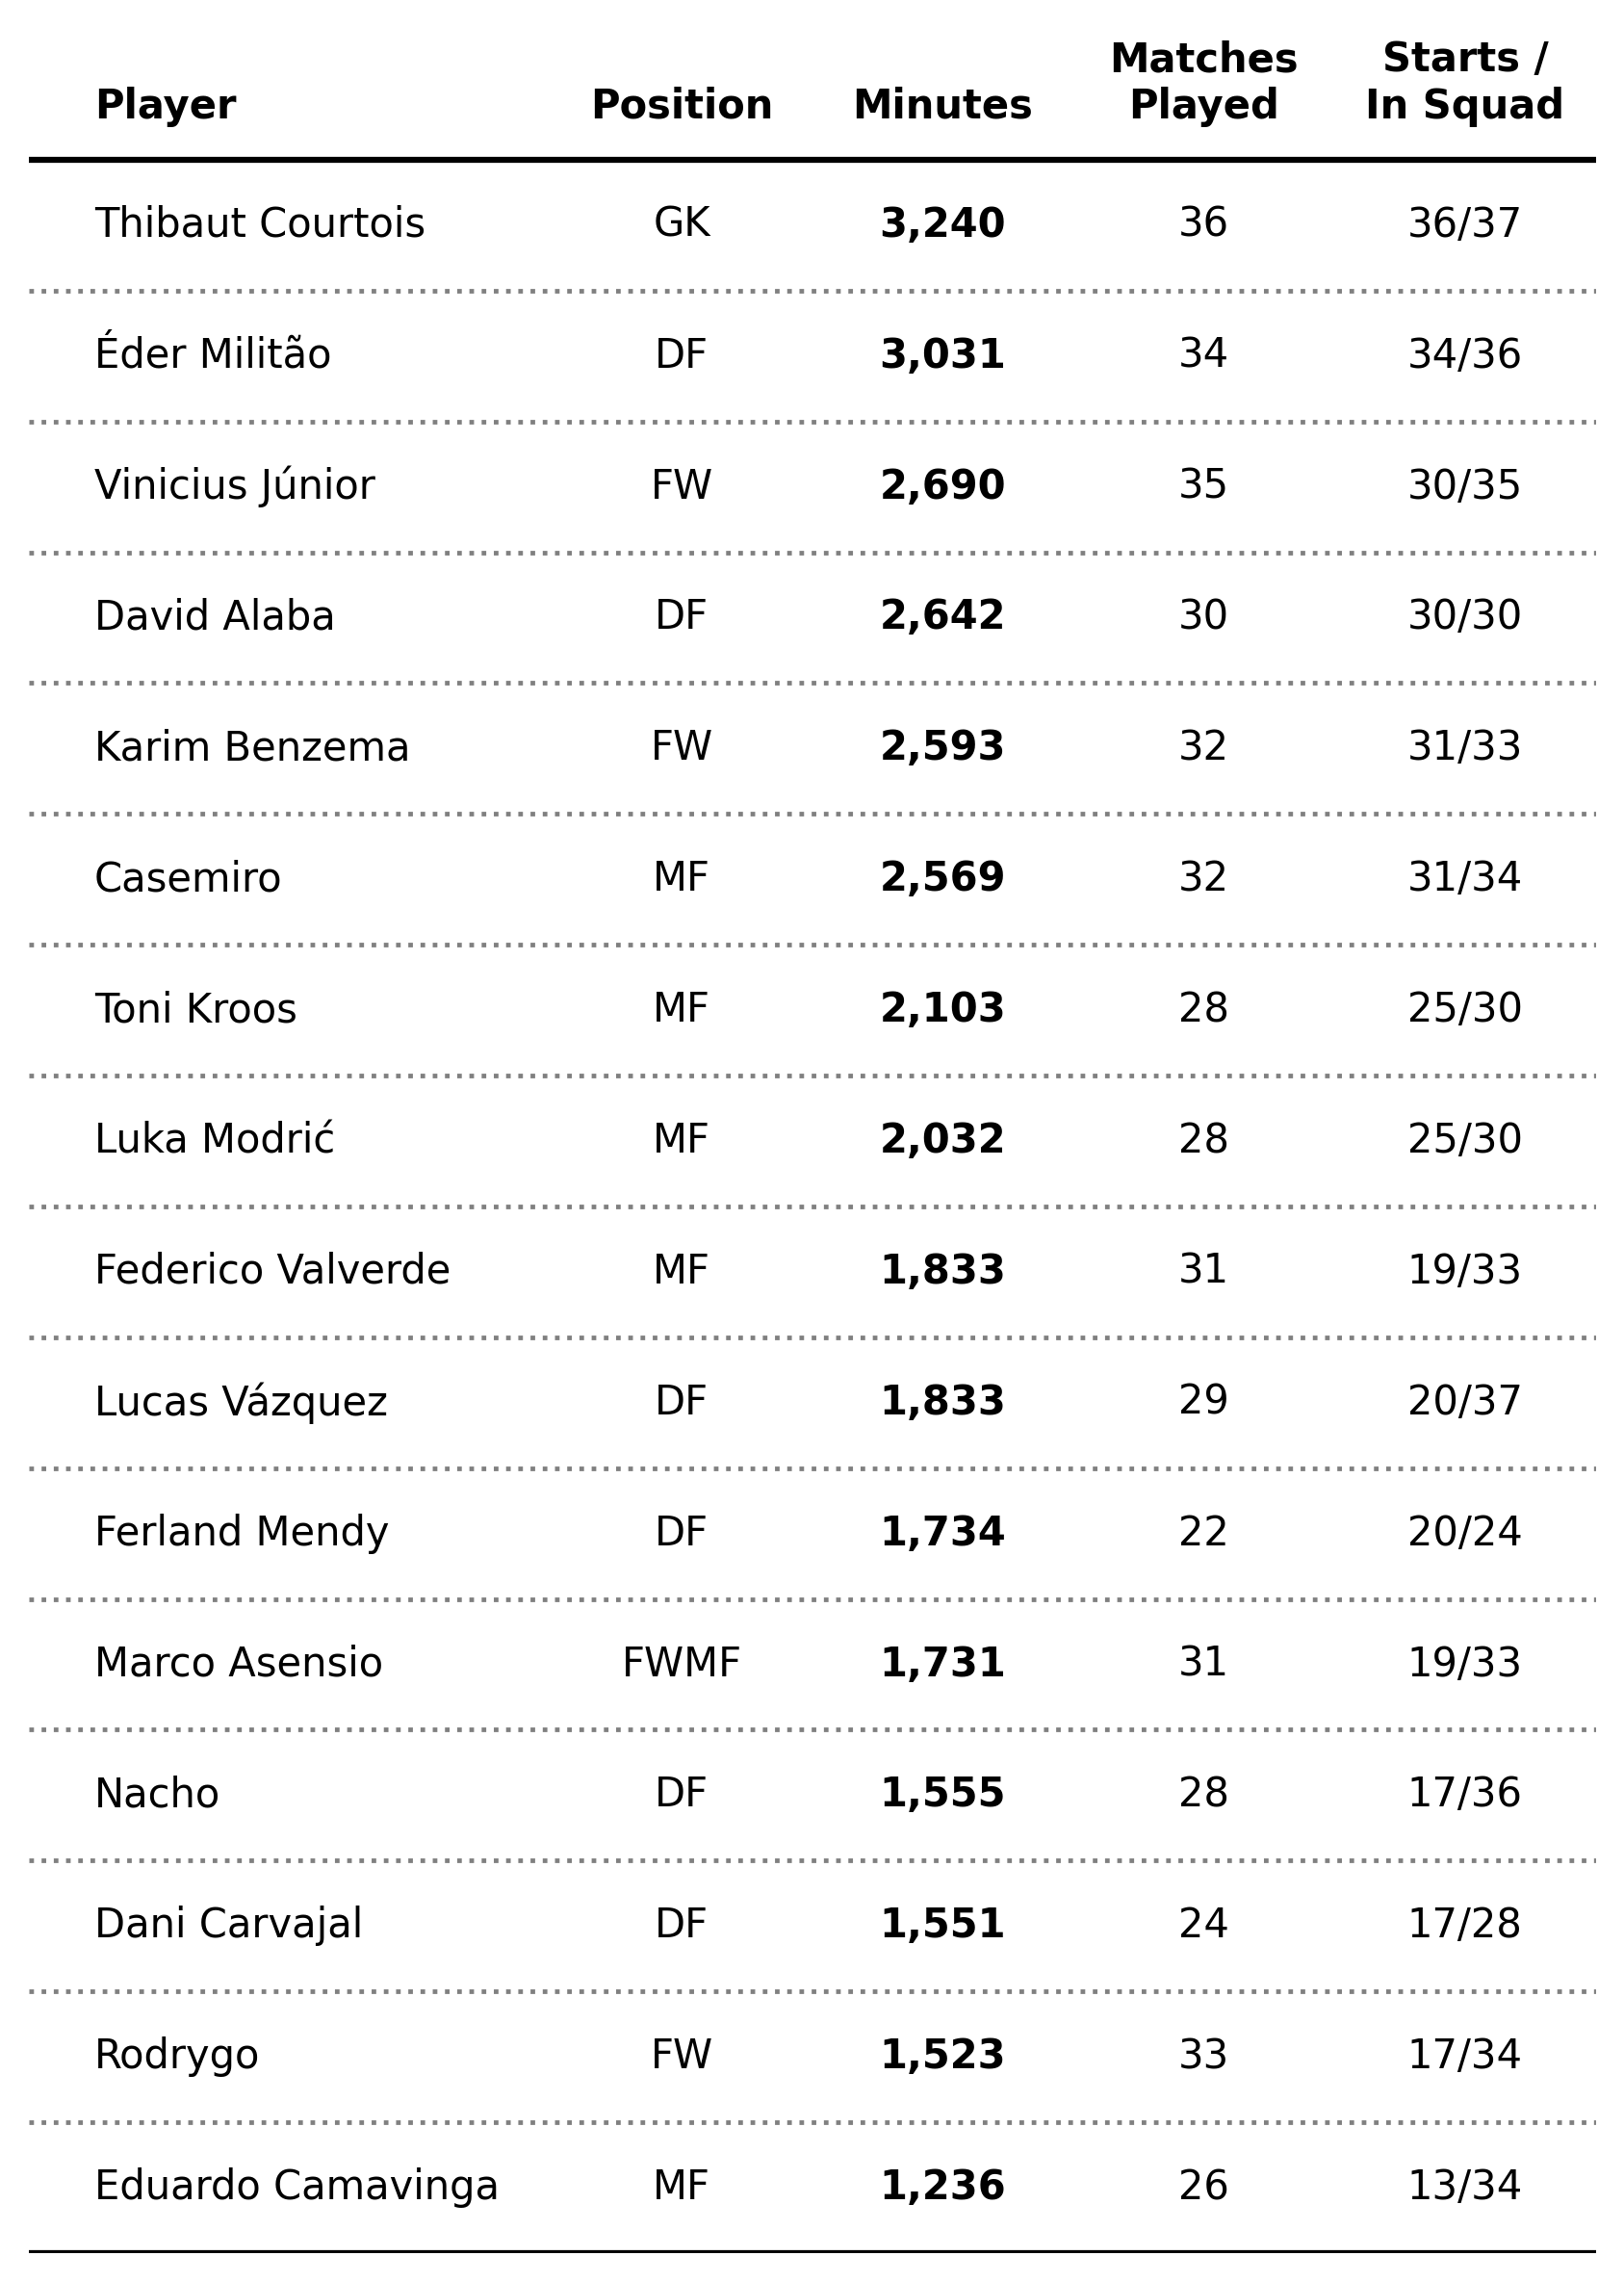

In [163]:
fig = plt.figure(figsize=(7,10), dpi=300)
ax = plt.subplot()

ncols = 5
nrows = df_example_2.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 2.5, 3.5, 4.5, 5.5]
columns = ['Player', 'Pos', 'Min', 'MP', 'Starts_InSquad']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            text_label = f'{df_example_2[column].iloc[i]:,.0f}'
            weight = 'bold'
        else:
            text_label = f'{df_example_2[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Player', 'Position', 'Minutes', 'Matches\nPlayed', 'Starts /\nIn Squad']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()
plt.savefig(
    'figures/pretty_example.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)

## Time to get fancy

In [164]:
df_final = df[df['Min'] >= 1000].reset_index(drop=True)
df_final = df_final[['Player', 'Nation', 'Pos', 'Min', 'MP', 'Starts', 'Subs', 'unSub']]
df_final['InSquad'] = df_final['MP'] + df_final['unSub']
df_final = df_final.sort_values(by='Min').reset_index(drop=True)
df_final = df_final[~df_final['Pos'].isna()]
df_final['Nation'] = [x.split(' ')[1].lower() for x in df_final['Nation']]
df_final['Starts_InSquad'] = [f'{x}/{y}' for x,y in zip(df_final['Starts'], df_final['InSquad'])]
print(tabulate(df_final.head(), tablefmt='pipe', headers='keys'))

|    | Player            | Nation   | Pos   |   Min |   MP |   Starts |   Subs |   unSub |   InSquad | Starts_InSquad   |
|---:|:------------------|:---------|:------|------:|-----:|---------:|-------:|--------:|----------:|:-----------------|
|  0 | Eduardo Camavinga | fra      | MF    |  1236 |   26 |       13 |     13 |       8 |        34 | 13/34            |
|  1 | Rodrygo           | bra      | FW    |  1523 |   33 |       17 |     16 |       1 |        34 | 17/34            |
|  2 | Dani Carvajal     | esp      | DF    |  1551 |   24 |       17 |      7 |       4 |        28 | 17/28            |
|  3 | Nacho             | esp      | DF    |  1555 |   28 |       17 |     11 |       8 |        36 | 17/36            |
|  4 | Marco Asensio     | esp      | FWMF  |  1731 |   31 |       19 |     12 |       2 |        33 | 19/33            |


Function to get the country logo

In [165]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

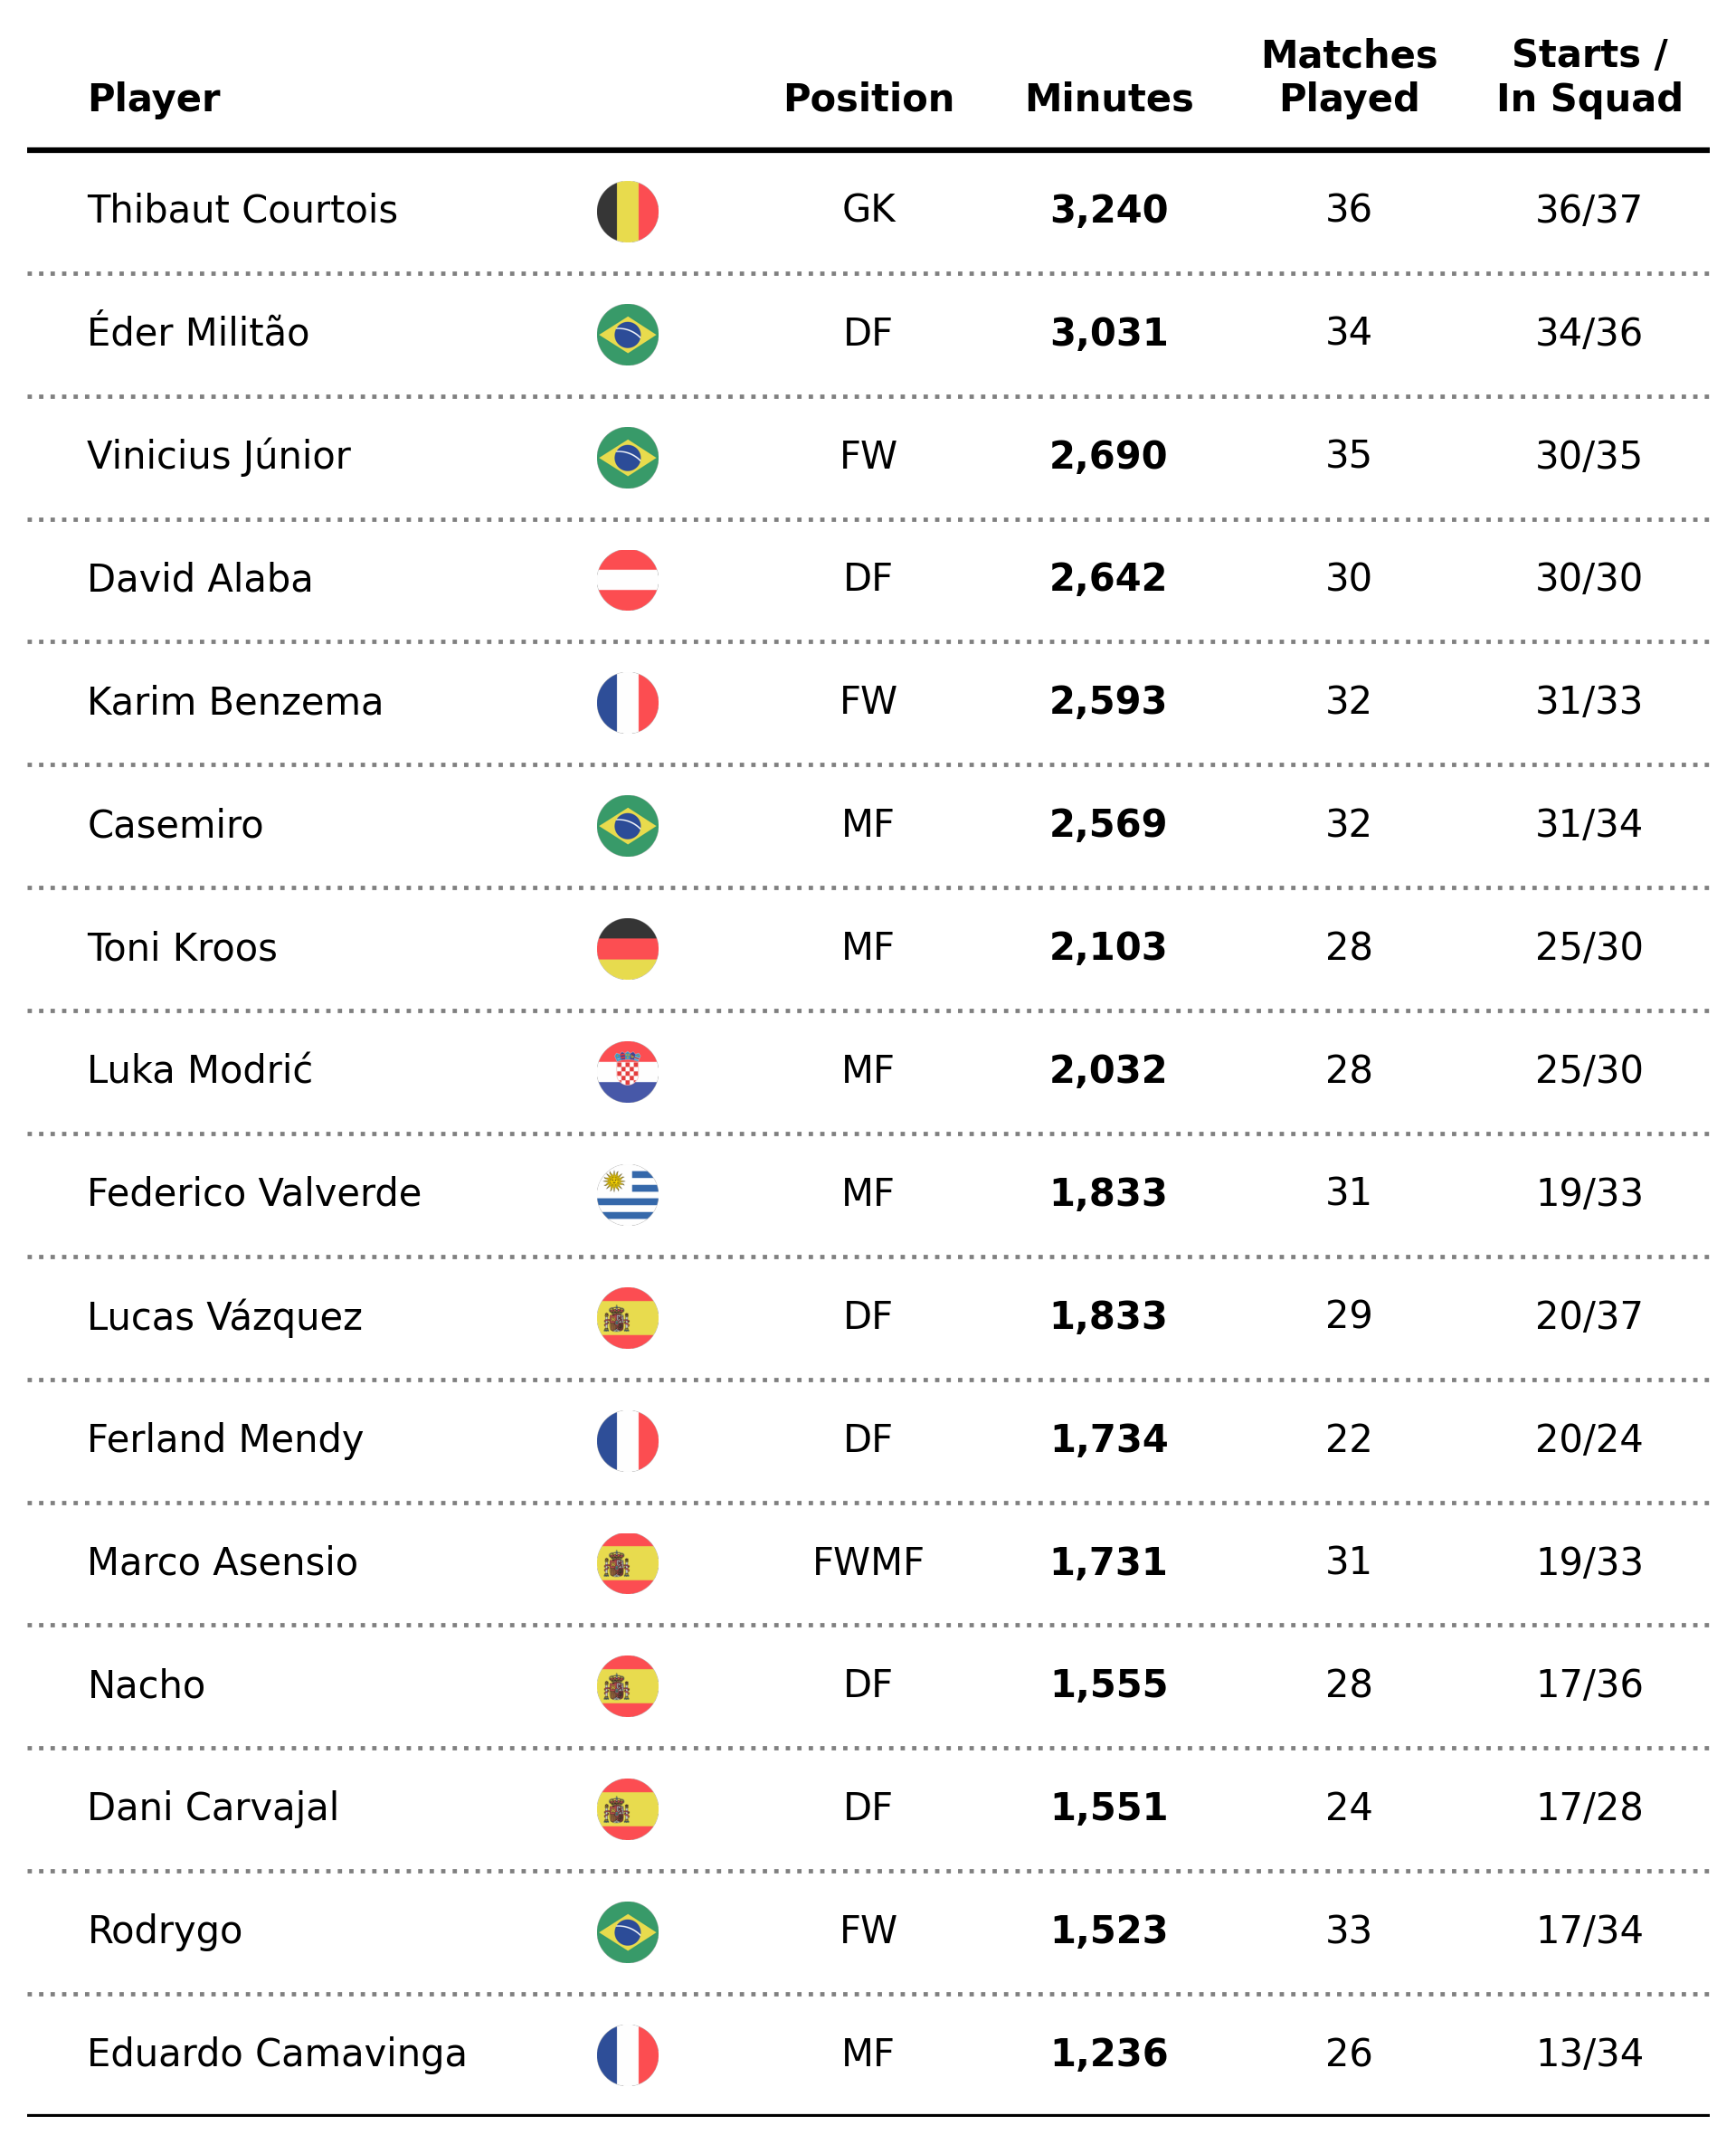

In [166]:
fig = plt.figure(figsize=(8,10), dpi=300)
ax = plt.subplot()

ncols = 6
nrows = df_final.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 3.5, 4.5, 5.5, 6.5]
columns = ['Player', 'Pos', 'Min', 'MP', 'Starts_InSquad']

# -- Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            text_label = f'{df_final[column].iloc[i]:,.0f}'
            weight = 'bold'
        else:
            text_label = f'{df_final[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df_final['Nation'].iloc[x], flag_ax)

# -- Add column names
column_names = ['Player', 'Position', 'Minutes', 'Matches\nPlayed', 'Starts /\nIn Squad']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()
plt.savefig(
    'figures/flag_example.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)

In [169]:
def minutes_battery(minutes, ax):
    '''
    This function takes an integer and an axes and 
    plots a battery chart.
    '''
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.barh([0.5], [1], fc = '#EFE9E6', ec='black', height=.35)
    ax.barh([0.5], [minutes/(90*38)], fc = '#00529F', height=.35)
    text_ = ax.annotate(
        xy=(minutes/(90*38), .5),
        text=f'{minutes/(90*38):.0%}',
        xytext=(-8,0),
        textcoords='offset points',
        weight='bold',
        color='#EFE9E6',
        va='center',
        ha='center',
        size=5
    )
    ax.set_axis_off()
    return ax

c:\Users\migue\Documents\Personal\Son of a corner\matplotlib-tutorials\.TutorialsVenv\lib\site-packages\ipykernel_launcher.py:116: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "faceolor" which is no longer supported as of 3.3 and will become an error in 3.6


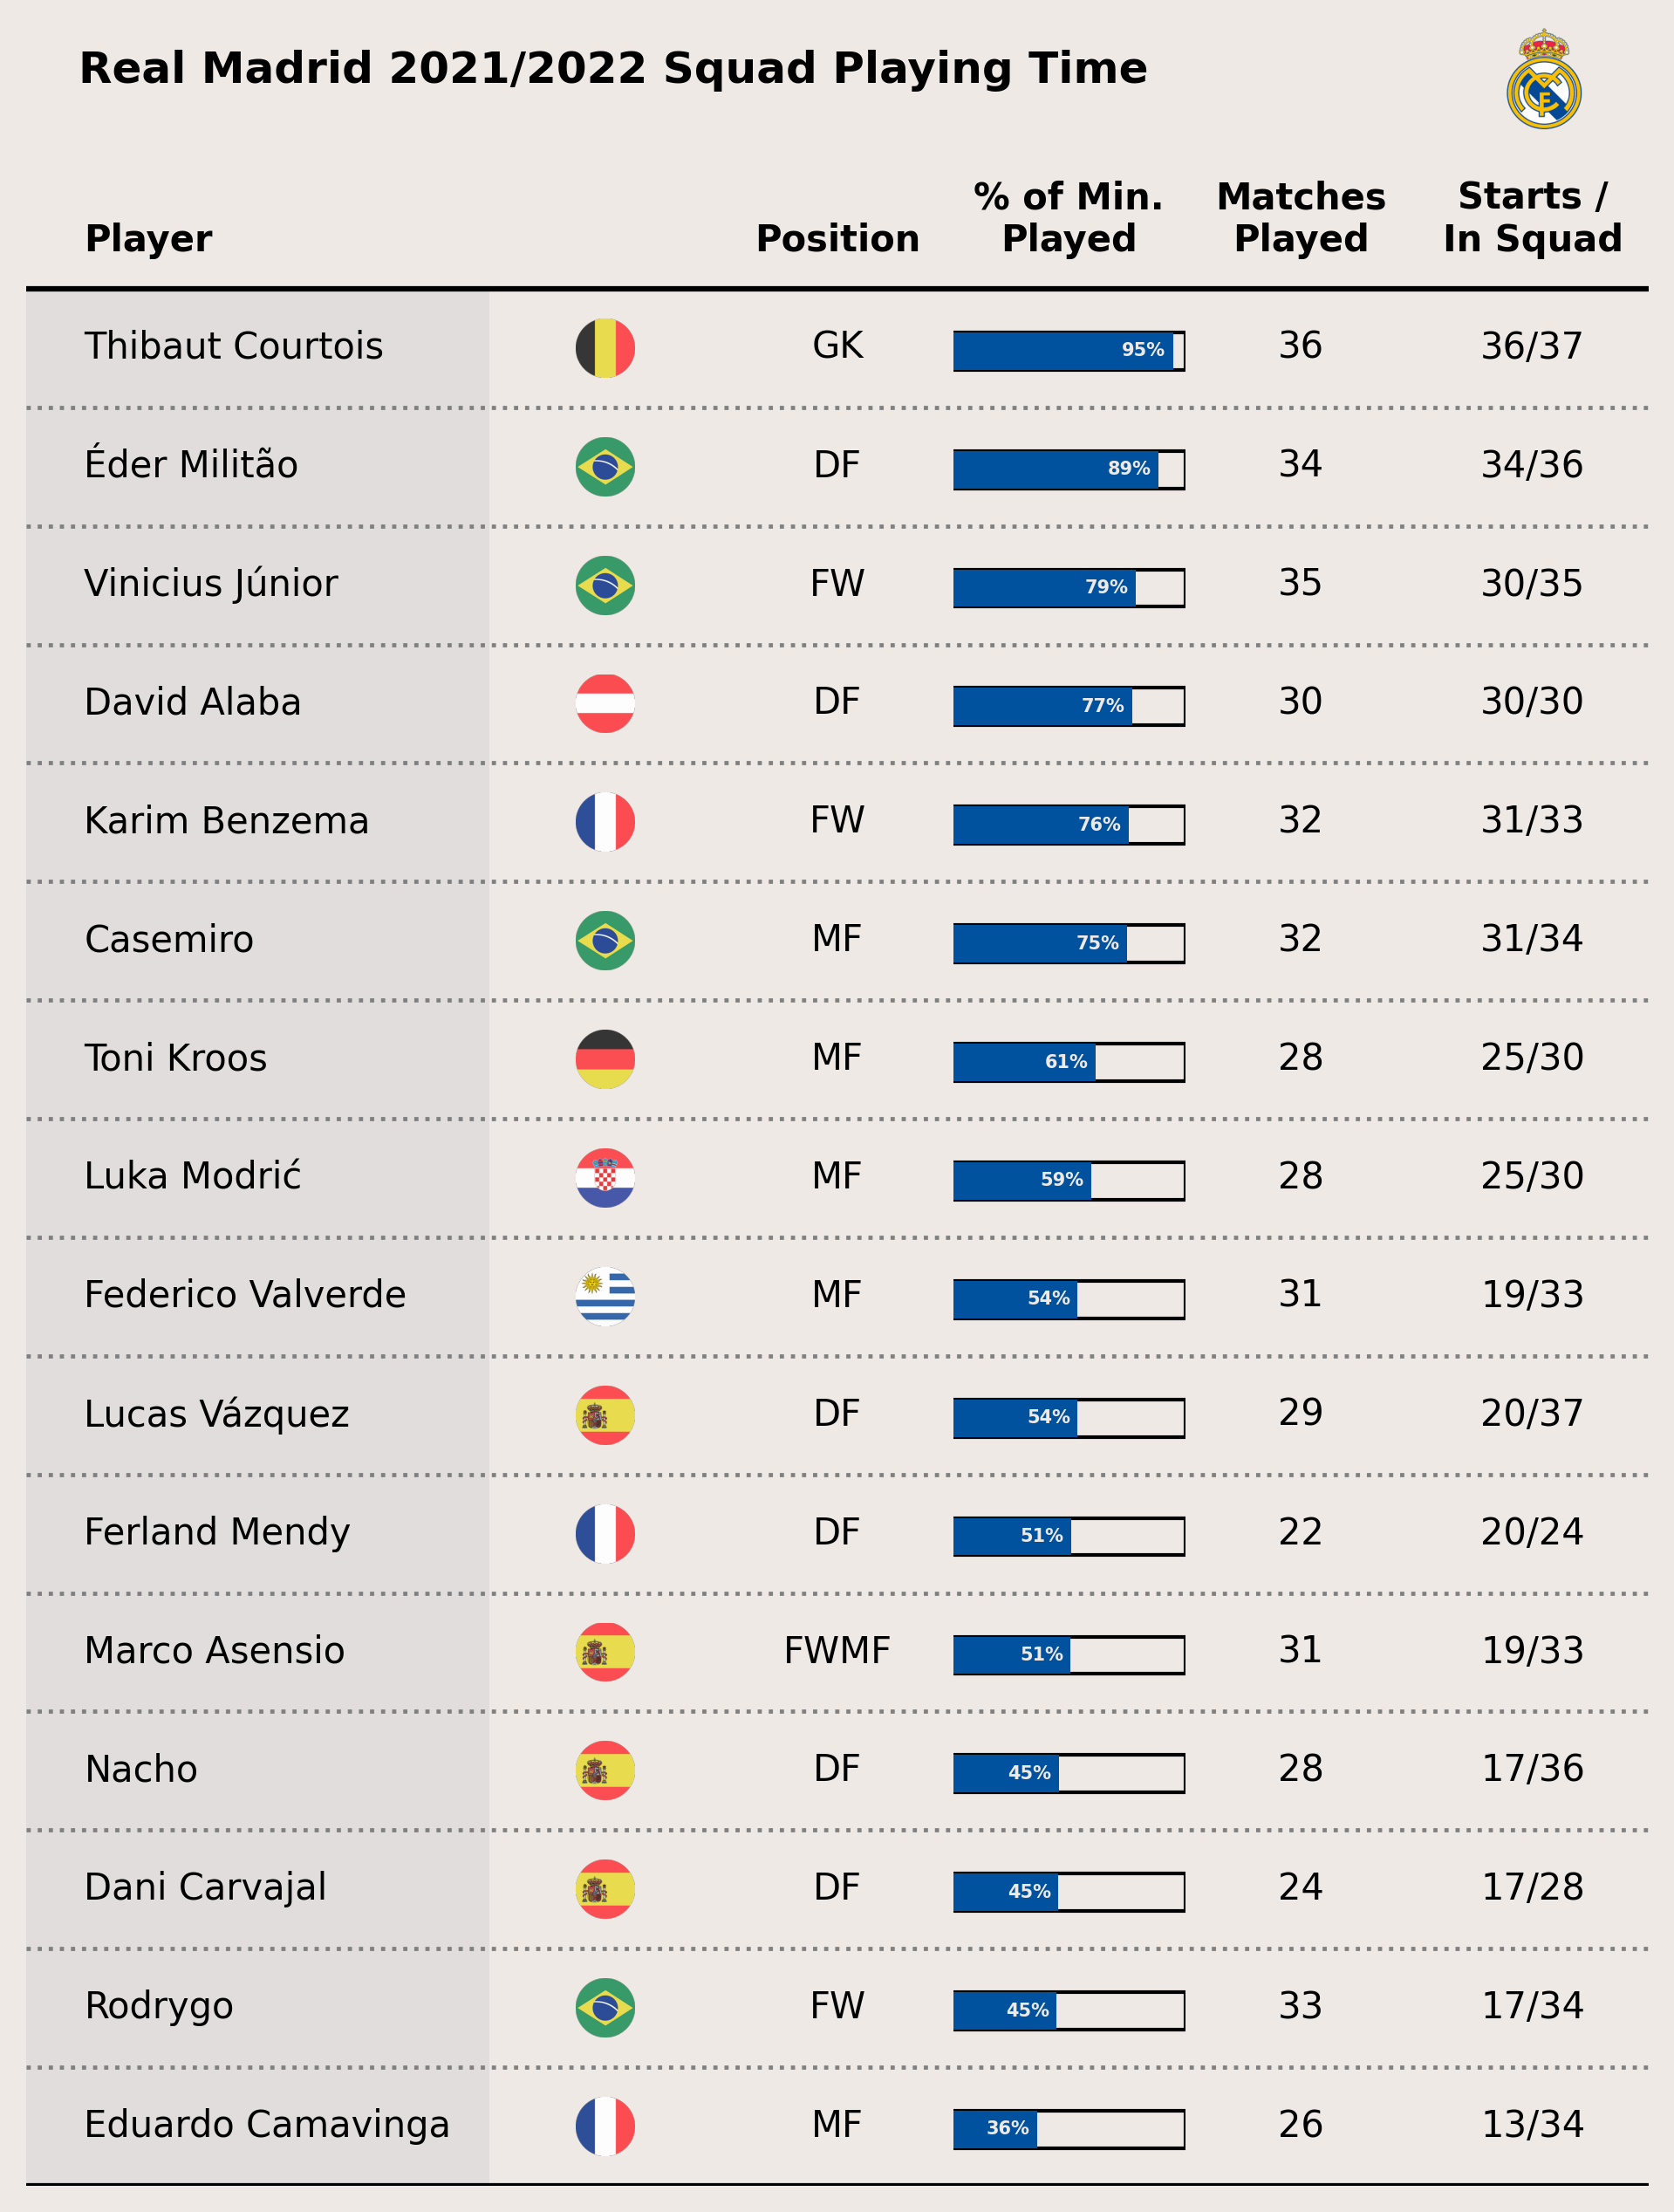

In [173]:
fig = plt.figure(figsize=(8,10), dpi=300, facecolor='#EFE9E6')
ax = plt.subplot()

ncols = 6
nrows = df_final.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 3.5, 4.5, 5.5, 6.5]
columns = ['Player', 'Pos', 'Min', 'MP', 'Starts_InSquad']

# -- Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            continue
        else:
            text_label = f'{df_final[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df_final['Nation'].iloc[x], flag_ax)

ax_point_1 = DC_to_NFC([4, 0.05])
ax_point_2 = DC_to_NFC([5, 0.95])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([4, x + .025])
    bar_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    minutes_battery(df_final['Min'].iloc[x], bar_ax)

# -- Add column names
column_names = ['Player', 'Position', '% of Min.\nPlayed', 'Matches\nPlayed', 'Starts /\nIn Squad']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.fill_between(
    x=[0,2],
    y1=nrows,
    y2=0,
    color='lightgrey',
    alpha=0.5,
    ec='None'
)

ax.set_axis_off()
# -- Final details
logo_ax = fig.add_axes(
    [0.825, 0.89, .05, .05]
)
ax_logo(8633, logo_ax)
fig.text(
    x=0.15, y=.91,
    s='Real Madrid 2021/2022 Squad Playing Time',
    ha='left',
    va='bottom',
    weight='bold',
    size=12
)
plt.savefig(
    'figures/final_table.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)
plt.savefig(
    'figures/final_table_bkg.png',
    dpi=300,
    transparent=False,
    faceolor='#EFE9E6',
    bbox_inches='tight'
)